In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load datasets
df1 = pd.read_csv(r"C:\Users\Administrator\Desktop\extracted movie dataset\tmdb_5000_movies.csv")
df2 = pd.read_csv(r"C:\Users\Administrator\Desktop\extracted movie dataset\tmdb_5000_credits.csv")

In [2]:
# Display shape of datasets
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print(df1.shape)

Shape of df1: (4803, 20)
Shape of df2: (4803, 4)
(4803, 20)


In [3]:
# Ensure df1 and df2 have the same number of rows before assigning 'cast'
if df1.shape[0] == df2.shape[0]:
    df1['cast'] = df2['cast']
else:
    print("Error: df1 and df2 have different row counts. Cannot assign 'cast' column.")

In [4]:
# Display first few rows
print(df1.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [5]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast'],
      dtype='object')

In [6]:
df1=df1[['budget', 'genres', #'homepage', 'id', 'keywords',
        'original_language',
       #'original_title', 'overview', 
        'popularity', 'production_companies',
       #'production_countries', 
        'release_date', 'revenue', 'runtime',
       #'spoken_languages', 'status', 'tagline', 
        'title', 'vote_average',
       'vote_count', 'cast']].copy()
print(df1.columns)

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'cast'],
      dtype='object')


In [7]:
df1.shape

(4803, 12)

In [8]:
# Check missing values
missing_rows_count = df1.isna().sum().sum()
print("Total missing values:", missing_rows_count)


Total missing values: 3


In [9]:
df1.shape

(4803, 12)

In [19]:
# Drop missing values
df1 = df1.dropna().copy()

In [21]:
# Remove duplicates
df1 = df1.loc[~df1.duplicated()].copy()

In [23]:
# Reset index
df1 = df1.reset_index(drop=True)

In [25]:
df1.shape

(4800, 12)

In [27]:
# ✅ Function to remove outliers using IQR
def remove_outliers(df, column):
    if column in df.columns:
        Q1, Q3 = df[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df


In [29]:
df1.shape

(4800, 12)

In [31]:
# ✅ Apply outlier removal to df1
for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']:
    df1 = remove_outliers(df1, col)

In [33]:

print("Shape before scaling:", df1.shape)


Shape before scaling: (3673, 12)


In [35]:

# ✅ Normalize numeric features using MinMaxScaler
num_features = df1.select_dtypes(include=['int64', 'float64']).columns  # Get numeric columns
scaler = MinMaxScaler()
df1[num_features] = scaler.fit_transform(df1[num_features])  # Apply scaling

In [37]:
print("Missing values before scaling:\n", df1.isna().sum())
print("Shape before scaling:", df1.shape)


Missing values before scaling:
 budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
cast                    0
dtype: int64
Shape before scaling: (3673, 12)


In [39]:
# Print final DataFrame shape
print("Final shape of df1:", df1.shape)

Final shape of df1: (3673, 12)


In [41]:
# Print sample of cleaned DataFrame
print(df1.head())

       budget                                             genres  \
83   0.275510  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
97   0.153061  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
151  0.714286  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
235  0.992351  [{"id": 14, "name": "Fantasy"}, {"id": 12, "na...   
265  0.000000  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...   

    original_language  popularity  \
83                 en    0.044060   
97                 ja    0.172667   
151                en    0.648665   
235                fr    0.370673   
265                en    0.332534   

                                  production_companies release_date   revenue  \
83   [{"name": "Corsan", "id": 7299}, {"name": "Bli...   2015-02-13  0.000000   
97   [{"name": "Cine Bazar", "id": 5896}, {"name": ...   2016-07-29  0.125838   
151  [{"name": "Paramount Pictures", "id": 4}, {"na...   2007-11-05  0.319882   
235  [{"name": "Constantin Film", "id": 47},

In [43]:
# Define numerical columns
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

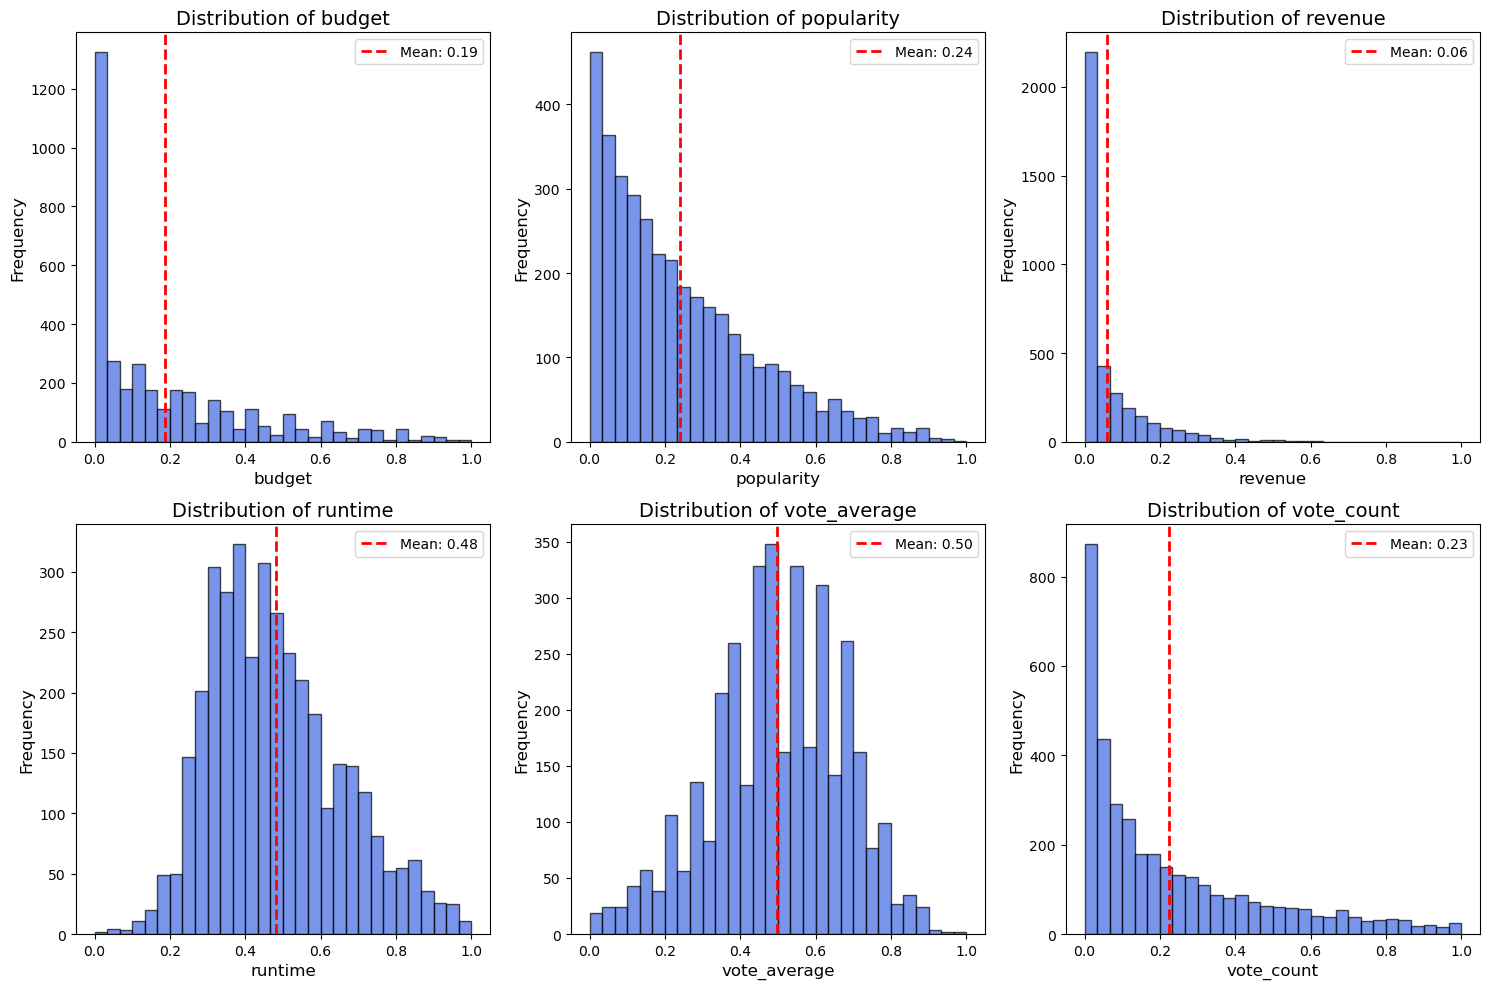

In [45]:
# Plot each histogram separately for better readability
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(numeric_cols):
    axes[i].hist(df1[col], bins=30, color='royalblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

    # Add mean line
    mean_value = df1[col].mean()
    axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

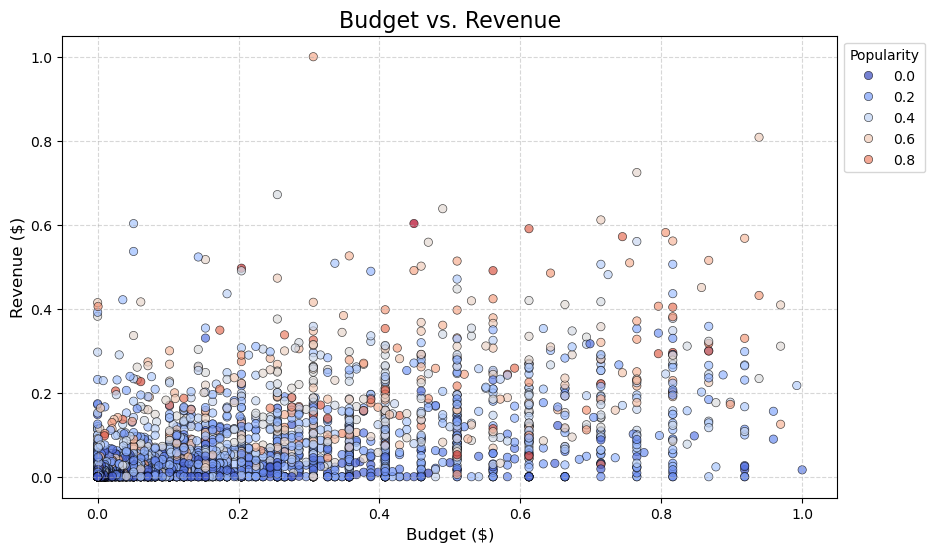

In [46]:
#scatter plot for budget vs revenue scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df1, hue='popularity', palette='coolwarm', alpha=0.7, edgecolor='black')
plt.title("Budget vs. Revenue", fontsize=16)
plt.xlabel("Budget ($)", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.legend(title="Popularity", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


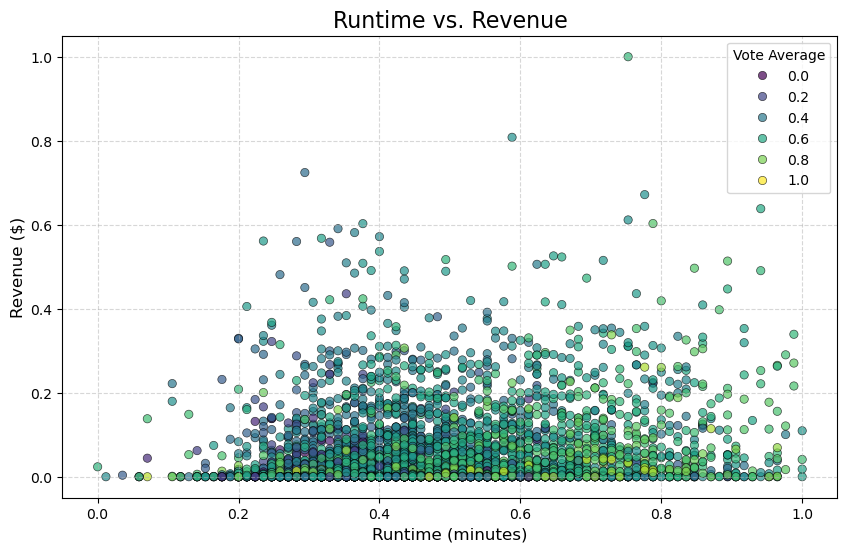

In [47]:
#runtime vs revenue scatter plot 

plt.figure(figsize=(10, 6))

sns.scatterplot(x='runtime', y='revenue', data=df1, hue='vote_average', palette='viridis', alpha=0.7, edgecolor='black')
plt.title("Runtime vs. Revenue", fontsize=16)
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.legend(title="Vote Average", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


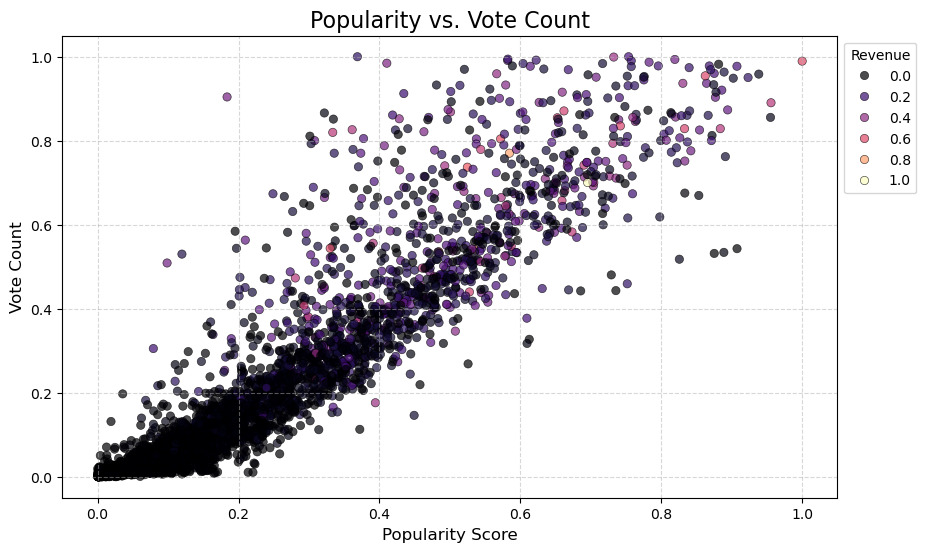

In [49]:
#popularity vs vote count scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_count', data=df1, hue='revenue', palette='magma', alpha=0.7, edgecolor='black')
plt.title("Popularity vs. Vote Count", fontsize=16)
plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Vote Count", fontsize=12)
plt.legend(title="Revenue", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


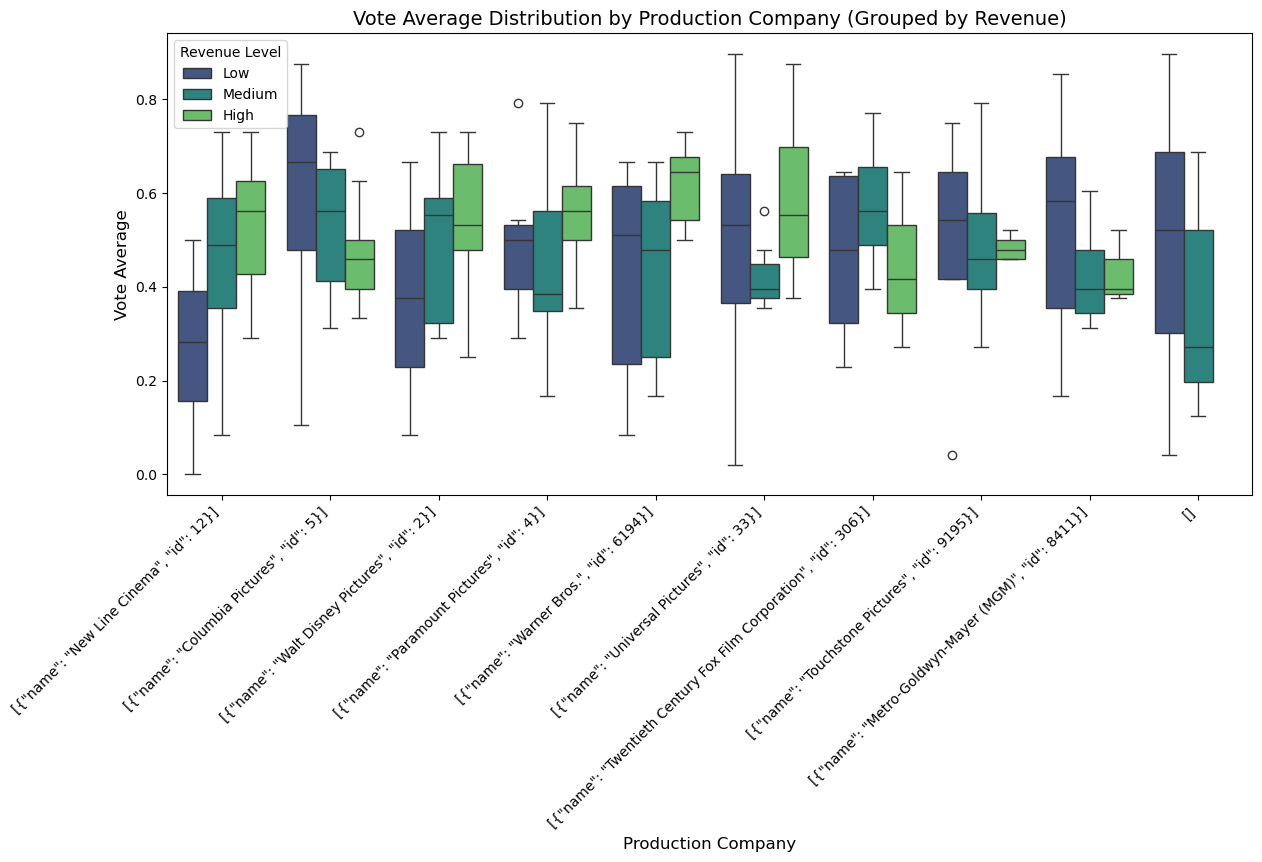

In [51]:
#boxplot for vote average vs production company

# Handle zero revenues to avoid issues in pd.qcut()
df1['revenue'] = df1['revenue'].replace(0, np.nan)
df1 = df1.dropna(subset=['revenue']).reset_index(drop=True)

# Create revenue categories (handle duplicate bins)
df1['revenue_category'] = pd.qcut(df1['revenue'], q=3, labels=["Low", "Medium", "High"])

# Select top 10 production companies
top_production_companies = df1['production_companies'].value_counts().index[:10]
df_filtered = df1[df1['production_companies'].isin(top_production_companies)]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='production_companies', y='vote_average', hue='revenue_category',
            data=df_filtered, palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Vote Average Distribution by Production Company (Grouped by Revenue)", fontsize=14)
plt.xlabel("Production Company", fontsize=12)
plt.ylabel("Vote Average", fontsize=12)
plt.legend(title="Revenue Level")

plt.show()


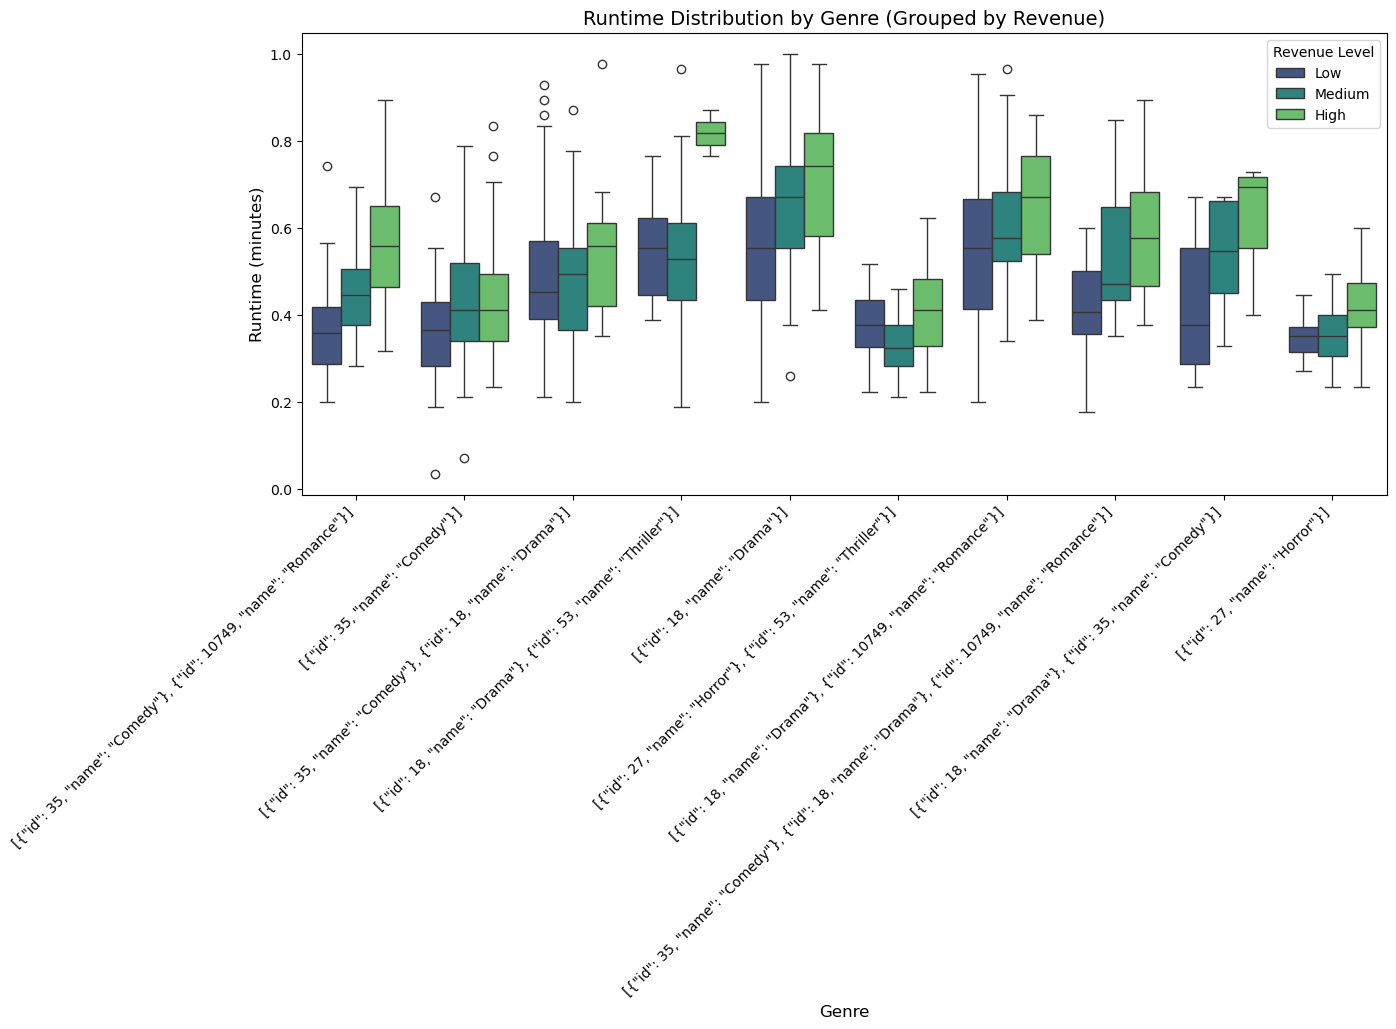

(2420, 13)


In [54]:
#box  plot for runtime vs genre 

# Categorize revenue into groups (fix duplicate bin error)
df1['revenue_category'] = pd.qcut(df1['revenue'], q=3, labels=["Low", "Medium", "High"])

# Select only the top 10 most frequent genres for clarity
top_genres = df1['genres'].value_counts().index[:10]
df_filtered = df1[df1['genres'].isin(top_genres)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='genres', y='runtime', hue='revenue_category', 
            data=df_filtered, palette="viridis")

# Improve readability
plt.xticks(rotation=45, ha="right")
plt.title("Runtime Distribution by Genre (Grouped by Revenue)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Runtime (minutes)", fontsize=12)
plt.legend(title="Revenue Level")  # Add legend

plt.show()
print(df1.shape)

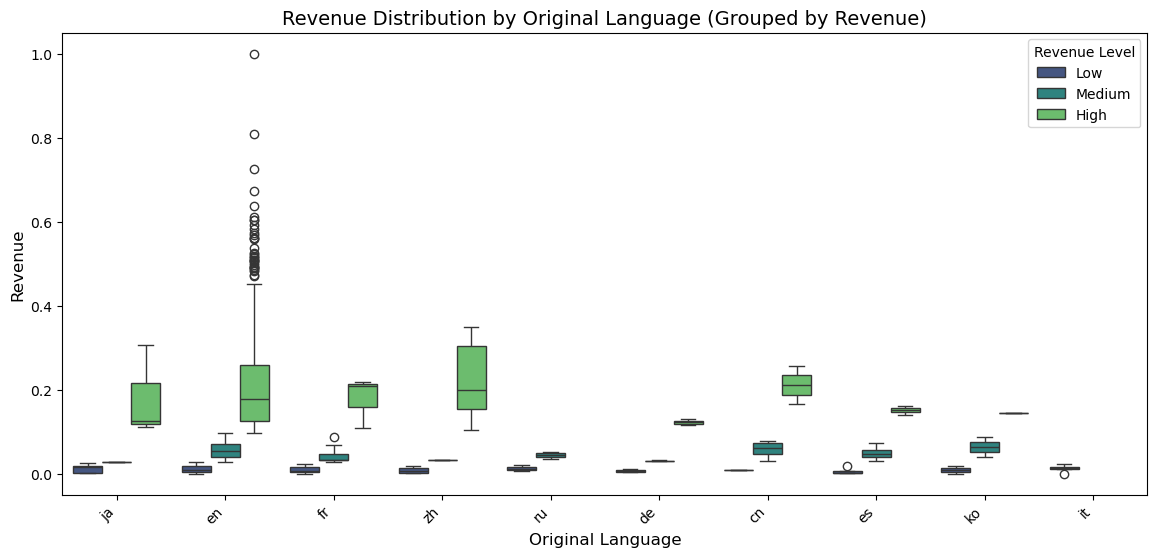

In [55]:
#revenue vs original language box plot
# Handle zero revenues to avoid issues in pd.qcut()
df1['revenue'] = df1['revenue'].replace(0, np.nan)
df1 = df1.dropna(subset=['revenue']).reset_index(drop=True)

# Categorize revenue into groups (fix duplicate bin error)
df1['revenue_category'] = pd.qcut(df1['revenue'], q=3, labels=["Low", "Medium", "High"])

# Select only the top 10 most frequent original languages for clarity
top_languages = df1['original_language'].value_counts().index[:10]
df_filtered = df1[df1['original_language'].isin(top_languages)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='original_language', y='revenue', hue='revenue_category', 
            data=df_filtered, palette="viridis")

# Improve readability
plt.xticks(rotation=45, ha="right")
plt.title("Revenue Distribution by Original Language (Grouped by Revenue)", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.legend(title="Revenue Level")  # Add legend

plt.show()

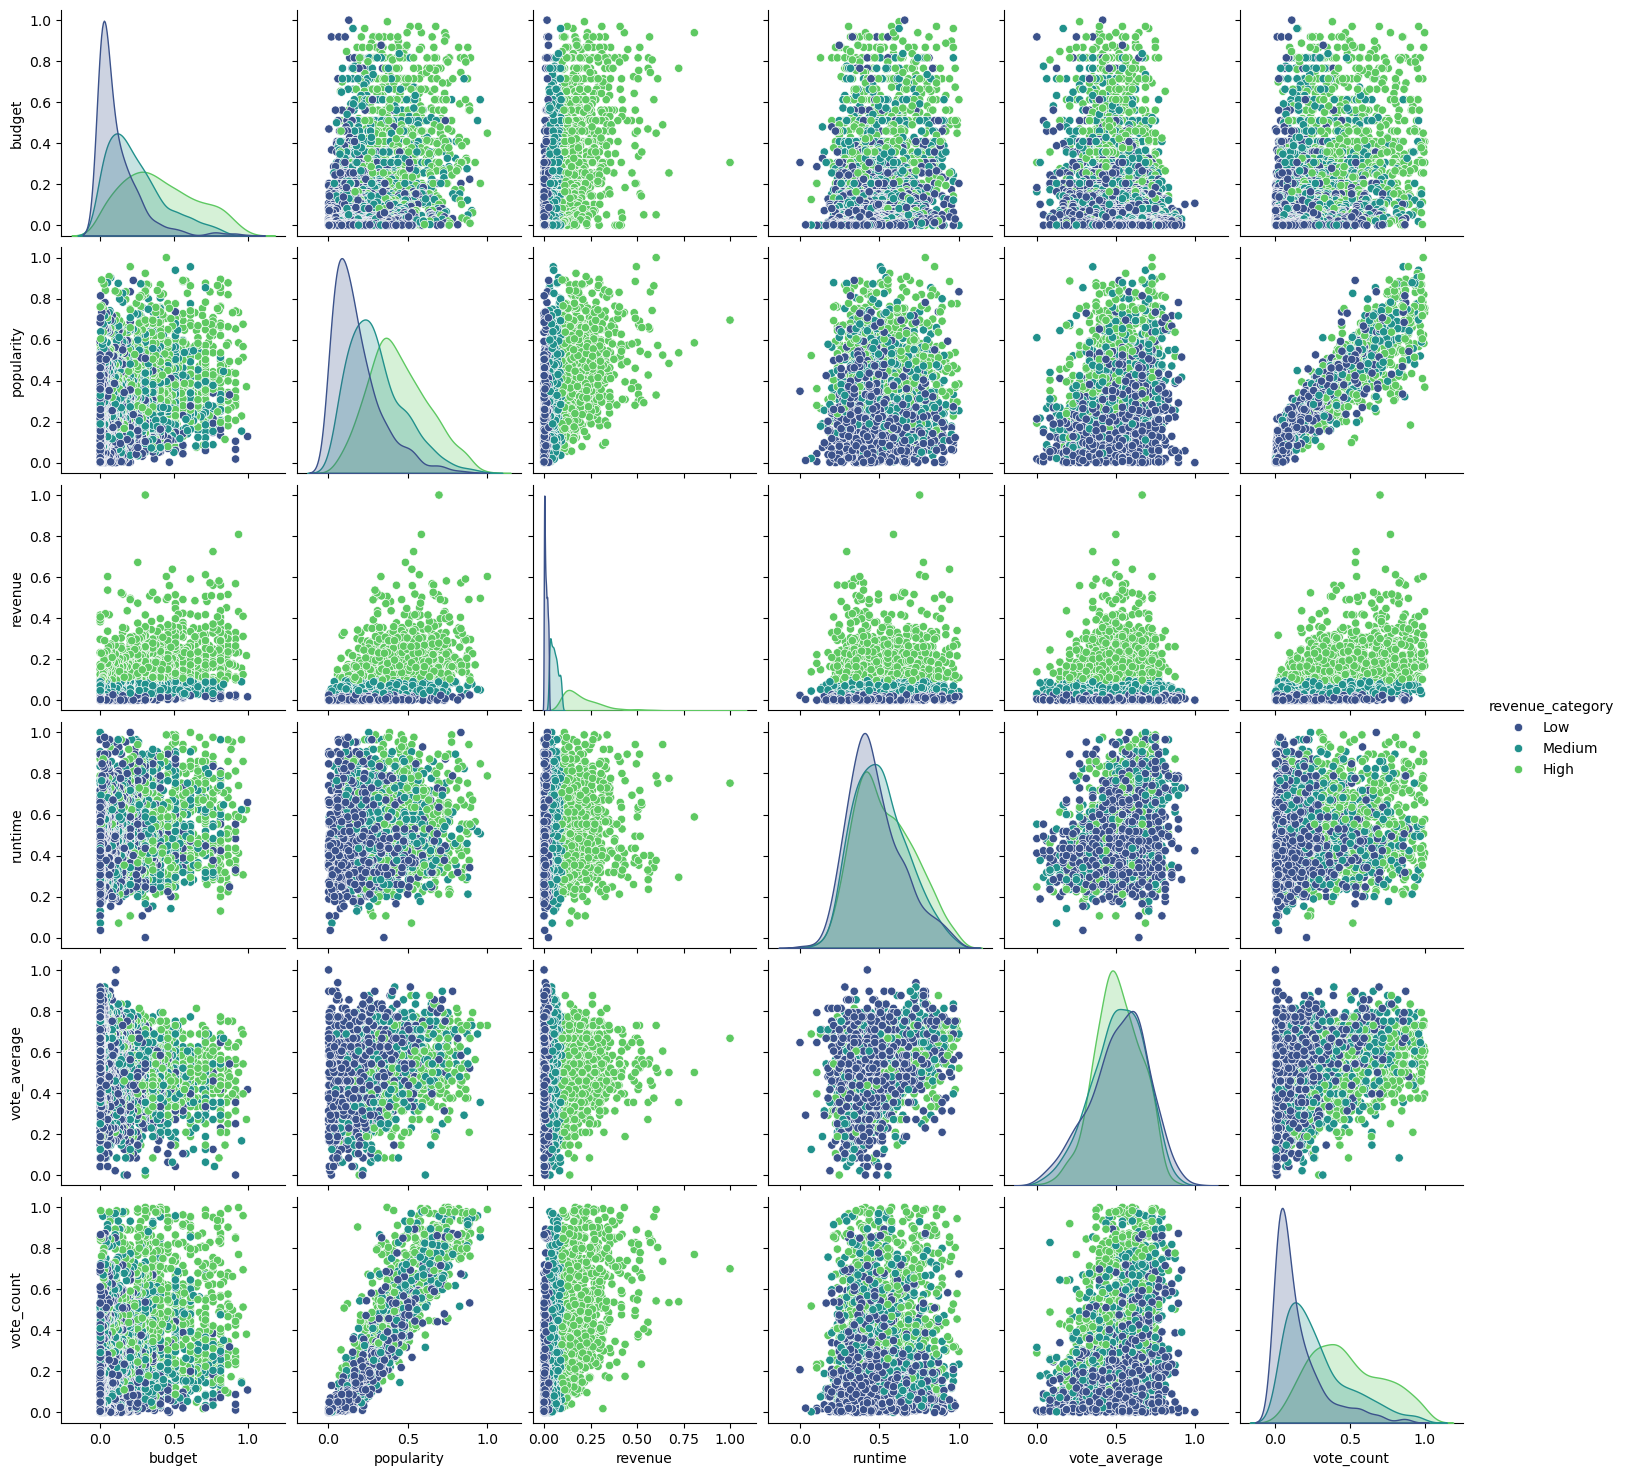

In [57]:
#pairplot allowing us to make comparison of various features against each other

# Ensure revenue has no zero values (avoid binning issues)
df1['revenue'] = df1['revenue'].replace(0, np.nan)
df1 = df1.dropna(subset=['revenue']).reset_index(drop=True)

# Categorize revenue into groups (fix duplicate bin issue)
df1['revenue_category'] = pd.qcut(df1['revenue'], q=3, labels=["Low", "Medium", "High"])

# Select numerical columns for comparison
numeric_features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Remove rows with NaN in revenue_category (to avoid errors in pairplot)
df_filtered = df1.dropna(subset=['revenue_category'])

# Create pairplot
sns.pairplot(df_filtered, vars=numeric_features, hue='revenue_category', palette='viridis', diag_kind='kde')

plt.show()


In [59]:
df1.shape


(2420, 13)

<Axes: >

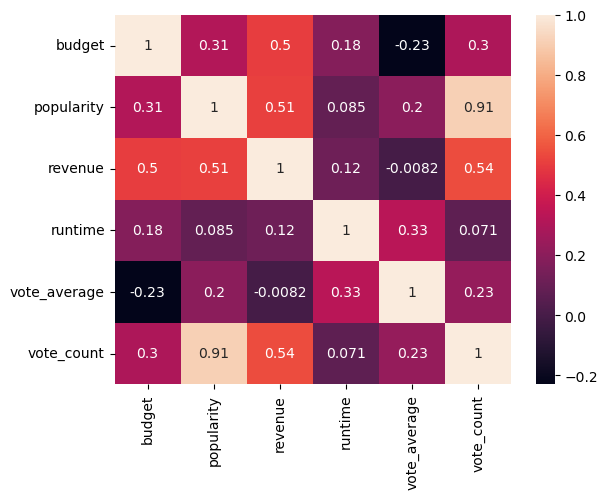

In [61]:
# correlation heat map 
df1_corr = df1[[ 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr() 
sns.heatmap(df1_corr , annot = True ) 

In [71]:
#start of model training 
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
word_columns = [ 'genres',  'original_language', 'production_companies','release_date' ,'title', 'cast']

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, StandardScaler


# ==============================
# 1️⃣ Encode Genres (Multi-Label Encoding)
# ==============================
df1['genres'] = df1['genres'].fillna('').apply(lambda x: x.split(','))  # Convert to list
mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(df1['genres']), columns=mlb.classes_)

# ==============================
# 2️⃣ Convert vote_average into Categories
# ==============================
df1['vote_category'] = pd.cut(df1['vote_average'], bins=[0, 4, 7, 10], labels=[0, 1, 2])  # 0=Low, 1=Medium, 2=High

# ==============================
# 3️⃣ Encode Categorical Features using Label Encoding
# ==============================
encoder = LabelEncoder()

# Encode original_language
df1['original_language'] = encoder.fit_transform(df1['original_language'].astype(str))

# Encode production_companies
df1['production_companies'] = encoder.fit_transform(df1['production_companies'].astype(str))

# Encode cast
df1['cast'] = encoder.fit_transform(df1['cast'].astype(str))

# ==============================
# 4️⃣ Normalize Numerical Features
# ==============================
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df1[numeric_cols]), columns=numeric_cols)

# ==============================
# 🔹 Final Processed Dataset
# ==============================
# Combine everything
X = pd.concat([df_numeric, df1[['original_language', 'production_companies', 'cast']], df_genres], axis=1)
y_genre = df_genres  # Multi-label classification
y_rating = df1['vote_category']  # Multi-class classification

# Display processed dataset shape
print(f"Processed Features Shape: {X.shape}")
print(f"Genre Labels Shape: {y_genre.shape}")
print(f"Vote Category Shape: {y_rating.shape}")


Processed Features Shape: (2420, 85)
Genre Labels Shape: (2420, 77)
Vote Category Shape: (2420,)


In [79]:
from sklearn.model_selection import train_test_split      #splitting data 

# Split for genre prediction (Multi-label classification)
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X, y_genre, test_size=0.2, random_state=42)

# Split for rating prediction (Multi-class classification)
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(X, y_rating, test_size=0.2, random_state=42)


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
                                                                             #genre prediction
# Create a base Random Forest model
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap it with MultiOutputClassifier for multi-label classification
rf_genre_model = MultiOutputClassifier(rf_base)

# Train the model
rf_genre_model.fit(X_train_genre, y_train_genre)

# Predictions
y_pred_genre = rf_genre_model.predict(X_test_genre)


In [90]:
print(df1['vote_category'].isnull().sum())  # Check how many NaN values are in the target


4


In [94]:
df1 = df1.dropna(subset=['vote_category'])


In [106]:
df1['vote_category'] = df1['vote_category'].fillna(df1['vote_category'].mode()[0])


In [112]:
# Remove rows where 'vote_category' is NaN to match X
df1 = df1.dropna(subset=['vote_category'])

# Ensure X is also aligned with df1 after dropping rows
X = X.loc[df1.index]  

# Split data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    X, df1['vote_category'], test_size=0.2, random_state=42
)

# Train the model
rf_rating_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rating_model.fit(X_train_rating, y_train_rating)

# Predictions
y_pred_rating = rf_rating_model.predict(X_test_rating)

# Check the number of samples in X and y after cleaning
print(f"X shape: {X.shape}")
print(f"y shape: {df1['vote_category'].shape}")


X shape: (2416, 85)
y shape: (2416,)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier                         #rating prediction

# Ensure df1 is used
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    X, df1['vote_category'], test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_rating_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rating_model.fit(X_train_rating, y_train_rating)

# Make predictions
y_pred_rating = rf_rating_model.predict(X_test_rating)


In [118]:
from sklearn.metrics import accuracy_score, classification_report

# Genre Prediction Evaluation (Multi-label)
print("Genre Classification Report:")
print(classification_report(y_test_genre, y_pred_genre, target_names=y_genre.columns.tolist(), zero_division=1))

# Rating Prediction Evaluation (Multi-class)
print("\nRating Classification Report:")
print(classification_report(y_test_rating, y_pred_rating, zero_division=1))


Genre Classification Report:
                              precision    recall  f1-score   support

           "name": "Action"}       1.00      1.00      1.00        98
          "name": "Action"}]       1.00      1.00      1.00        11
        "name": "Adventure"}       1.00      1.00      1.00        58
       "name": "Adventure"}]       1.00      1.00      1.00         8
        "name": "Animation"}       1.00      1.00      1.00        20
       "name": "Animation"}]       1.00      0.00      0.00         2
           "name": "Comedy"}       1.00      1.00      1.00       127
          "name": "Comedy"}]       1.00      1.00      1.00        53
            "name": "Crime"}       1.00      1.00      1.00        58
           "name": "Crime"}]       1.00      1.00      1.00        29
      "name": "Documentary"}       1.00      0.50      0.67         4
     "name": "Documentary"}]       1.00      1.00      1.00         3
            "name": "Drama"}       1.00      1.00      1.00 